# Exploring the mentions of Mette Frederiksen on Twitter

In [1]:
import pandas as pd
from icecream import ic

In [3]:
df = pd.read_csv("MF_data_SA.csv")
print(len(df))
df.head()

30629


,created_at,id,text,MF,neg,neu,pos,compound
0,Wed Apr 08 22:16:35 +0000 2020,1248011885540081665,"Mette Frederiksen forsikrede, at varslet genåb...",['mette frederiksen'],0.000,1.000,0.000,0.0000
1,Wed Apr 08 21:31:31 +0000 2020,1248000545765445636,@pomaEB Enig. Peter Geisling siger det lige ud...,['mette frederiksen'],0.000,0.864,0.136,0.4588
2,Wed Apr 08 20:50:39 +0000 2020,1247990260774113287,Plan for genåbning af skolerne er på vej Efter...,['mette frederiksen'],0.000,0.936,0.064,0.0573
3,Wed Apr 08 20:40:47 +0000 2020,1247987778681479171,@VivaDenmark I hvert fald mere end Mette Frede...,['mette frederiksen'],0.222,0.778,0.000,-0.2500
4,Wed Apr 08 20:36:59 +0000 2020,1247986820543066112,Regeringen vil sende respiratorer til Italien:...,['mette frederiksen'],0.167,0.833,0.000,-0.4588


In [4]:
df["date"] = pd.to_datetime(df["created_at"], utc=True).dt.strftime('%Y-%m-%d')
df.describe()

,id,neg,neu,pos,compound
count,3.062900e+04,30629.000000,30629.000000,30629.000000,30629.000000
mean,1.300266e+18,0.058013,0.859625,0.082360,0.049026
std,3.978565e+16,0.080844,0.112289,0.088509,0.419928
min,1.223515e+18,0.000000,0.158000,0.000000,-0.987500
25%,1.261002e+18,0.000000,0.787000,0.000000,-0.169600
50%,1.313421e+18,0.000000,0.870000,0.066000,0.000000
75%,1.332613e+18,0.097000,0.947000,0.132000,0.325500
max,1.357116e+18,0.633000,1.000000,0.842000,0.985500


## Remove quote tweets

In [5]:
import re

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def remove_mentions(row):
    tweet = row["text"]
    clean_tweet = re.sub(r'@(\S*)\w', '', tweet) #mentions
    clean_tweet = re.sub(r'#\S*\w', '', clean_tweet) # hashtags
    # Remove URLs
    url_pattern = re.compile(
        r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})')
    clean_tweet = re.sub(url_pattern, '', clean_tweet)
    
    clean_tweet = remove_emoji(clean_tweet)
    
    return clean_tweet

In [6]:
df["mentioneless_text"] = df.apply(lambda row: remove_mentions(row), axis = 1)
df["text50"] = df["mentioneless_text"].str[0:50]
df["dupe50"] = df["text50"].duplicated(keep = "first")
ic(len(df[df["dupe50"] == True]))
df = df[df["dupe50"] == False].reset_index()

ic| len(df[df["dupe50"] == True]): 2225


## Explore keywords matches

In [7]:
df.groupby(["MF"]).count().reset_index()

,MF,index,created_at,id,text,neg,neu,pos,compound,date,mentioneless_text,text50,dupe50
0,['@statsmin'],9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263
1,"['mette frederiksen', '@statsmin']",446,446,446,446,446,446,446,446,446,446,446,446
2,"['mette frederiksen', 'mette fredriksen']",5,5,5,5,5,5,5,5,5,5,5,5
3,['mette frederiksen'],16252,16252,16252,16252,16252,16252,16252,16252,16252,16252,16252,16252
4,"['mette fredriksen', '@statsmin']",7,7,7,7,7,7,7,7,7,7,7,7
5,['mette fredriksen'],466,466,466,466,466,466,466,466,466,466,466,466
6,"['mettef', '#mettef', '@statsmin']",19,19,19,19,19,19,19,19,19,19,19,19
7,"['mettef', '#mettef', 'mette frederiksen']",3,3,3,3,3,3,3,3,3,3,3,3
8,"['mettef', '#mettef']",203,203,203,203,203,203,203,203,203,203,203,203
9,"['mettef', '@statsmin']",13,13,13,13,13,13,13,13,13,13,13,13


# Visualize how many tweets per day

In [8]:
# Aggregate a frequency DF
def get_tweet_frequencies(df):
    # Add freq of hashtags by themselves in the dataset
    tweet_freq = pd.DataFrame({'nr_of_tweets' : df.groupby(['date']).size()}).reset_index()

    # Add the whole_frew to id_hashtag
    freq_hashtags = pd.merge(df, tweet_freq, how='left', on=['date'])#, 'id', 'created_at'])
    
    return freq_hashtags

In [9]:
# Create a column which is just date
df["date"] = pd.to_datetime(df["created_at"], utc=True).dt.strftime('%Y-%m-%d')

freq_df = get_tweet_frequencies(df)
freq_df.head()

,index,created_at,id,text,MF,neg,neu,pos,compound,date,mentioneless_text,text50,dupe50,nr_of_tweets
0,0,Wed Apr 08 22:16:35 +0000 2020,1248011885540081665,"Mette Frederiksen forsikrede, at varslet genåb...",['mette frederiksen'],0.000,1.000,0.000,0.0000,2020-04-08,"Mette Frederiksen forsikrede, at varslet genåb...","Mette Frederiksen forsikrede, at varslet genåb...",False,81
1,1,Wed Apr 08 21:31:31 +0000 2020,1248000545765445636,@pomaEB Enig. Peter Geisling siger det lige ud...,['mette frederiksen'],0.000,0.864,0.136,0.4588,2020-04-08,"Enig. Peter Geisling siger det lige ud , det ...","Enig. Peter Geisling siger det lige ud , det ...",False,81
2,2,Wed Apr 08 20:50:39 +0000 2020,1247990260774113287,Plan for genåbning af skolerne er på vej Efter...,['mette frederiksen'],0.000,0.936,0.064,0.0573,2020-04-08,Plan for genåbning af skolerne er på vej Efter...,Plan for genåbning af skolerne er på vej Efter...,False,81
3,3,Wed Apr 08 20:40:47 +0000 2020,1247987778681479171,@VivaDenmark I hvert fald mere end Mette Frede...,['mette frederiksen'],0.222,0.778,0.000,-0.2500,2020-04-08,I hvert fald mere end Mette Frederiksen.,I hvert fald mere end Mette Frederiksen.,False,81
4,4,Wed Apr 08 20:36:59 +0000 2020,1247986820543066112,Regeringen vil sende respiratorer til Italien:...,['mette frederiksen'],0.167,0.833,0.000,-0.4588,2020-04-08,Regeringen vil sende respiratorer til Italien:...,Regeringen vil sende respiratorer til Italien:...,False,81


In [10]:
freq_df.nr_of_tweets.describe()

count    28404.000000
mean       144.331925
std        107.615853
min          4.000000
25%         59.000000
50%        110.000000
75%        208.000000
max        473.000000
Name: nr_of_tweets, dtype: float64

In [11]:
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyplot_themes as themes

In [12]:
freq_df["date"] = pd.to_datetime(freq_df["date"])

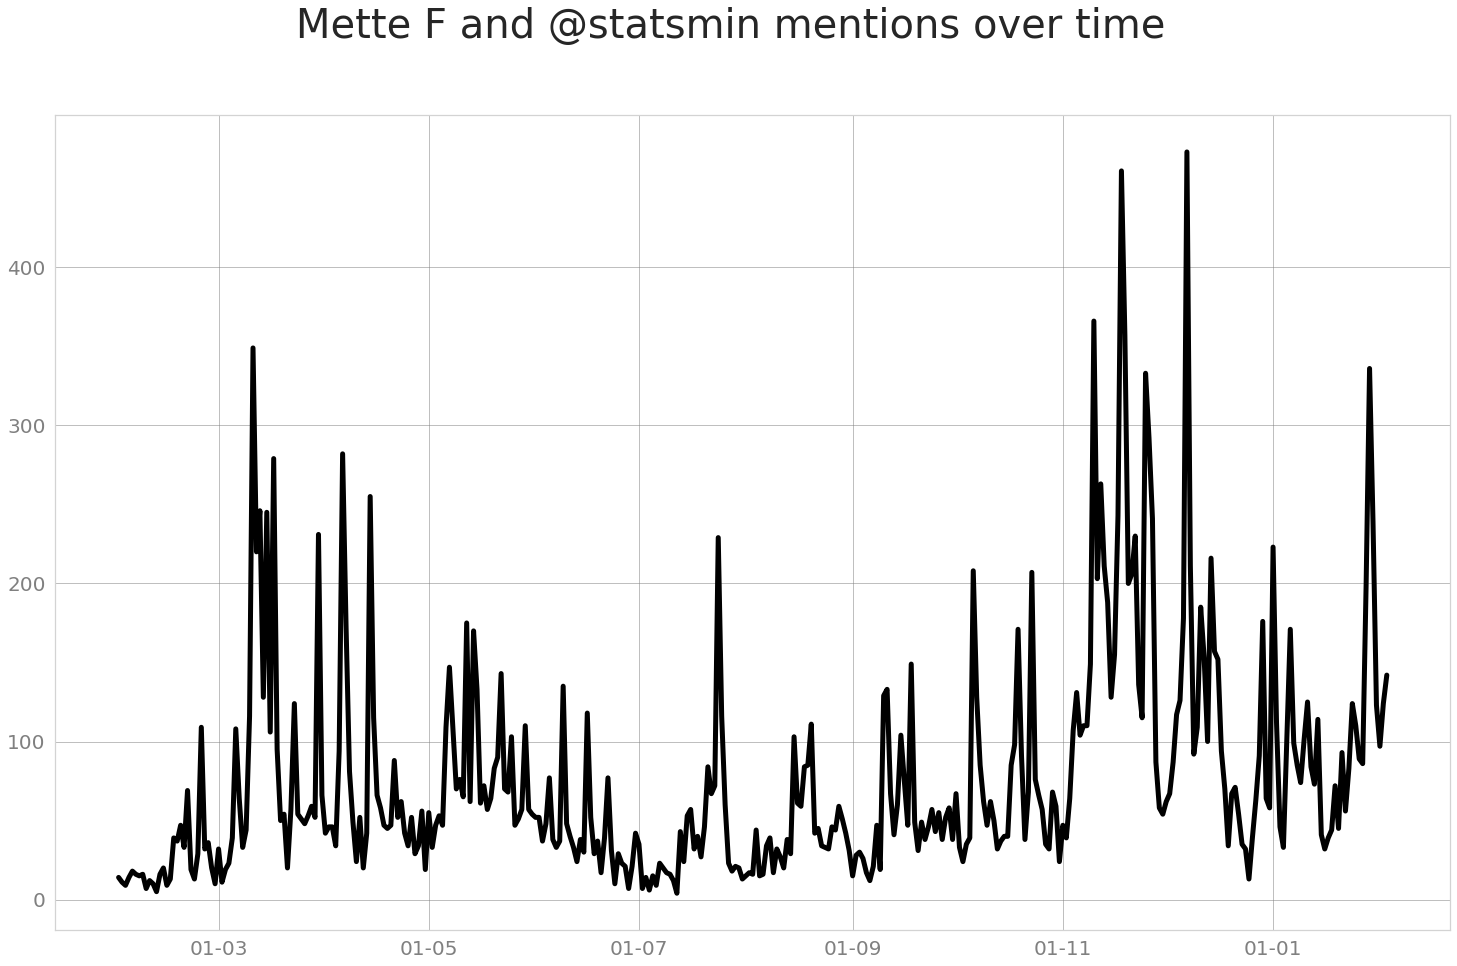

In [13]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

nr_colors = len(freq_df["date"].unique())

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

palette = sns.color_palette("inferno", nr_colors)

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)
ax1 = sns.lineplot(x="date", y="nr_of_tweets", 
                  palette = palette, 
                     linewidth = 5, data = freq_df)

ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

    
fig.suptitle("Mette F and @statsmin mentions over time", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()

#plot_name = "fig/survey_anxiety_visuals/" + "mean_anxiety_per_question" + ".png"
#fig.savefig(plot_name)

fig.show()

## Visualize just #MetteFrederiksen

In [14]:
def extract_MF(row):
    tweet = row["MF"]
    test_list = ['mettef', 'mettefrederiksen', 'mettefredriksen', 
                 '#mettef', '#mettefrederiksen', '#mettefredriksen',
                 'mette frederiksen', 'mette fredriksen'] 
    res = [ele for ele in test_list if(ele in tweet)] 
    return res
def extract_statsmin(row):
    tweet = row["MF"]
    test_list = ['@statsmin'] 
    res = [ele for ele in test_list if(ele in tweet)] 
    return res

df["just_MF"] = df.apply(lambda row: extract_MF(row), axis = 1)
df["just_statsmin"] = df.apply(lambda row: extract_statsmin(row), axis = 1)

df["just_MF"] = df["just_MF"].astype(str)
df["just_statsmin"] = df["just_statsmin"].astype(str)

In [15]:
MF_df = df[df["just_MF"] != '[]']
ic(len(MF_df))
s_df = df[df["just_statsmin"] != '[]']
ic(len(s_df))

MF_df["date"] = pd.to_datetime(MF_df["date"])
s_df["date"] = pd.to_datetime(s_df["date"])

MF_freq_df = get_tweet_frequencies(MF_df)
s_freq_df = get_tweet_frequencies(s_df)

MF_freq_df["date"] = pd.to_datetime(MF_freq_df["date"])
s_freq_df["date"] = pd.to_datetime(s_freq_df["date"])

ic| len(MF_df): 19141
ic| len(s_df): 9781
/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


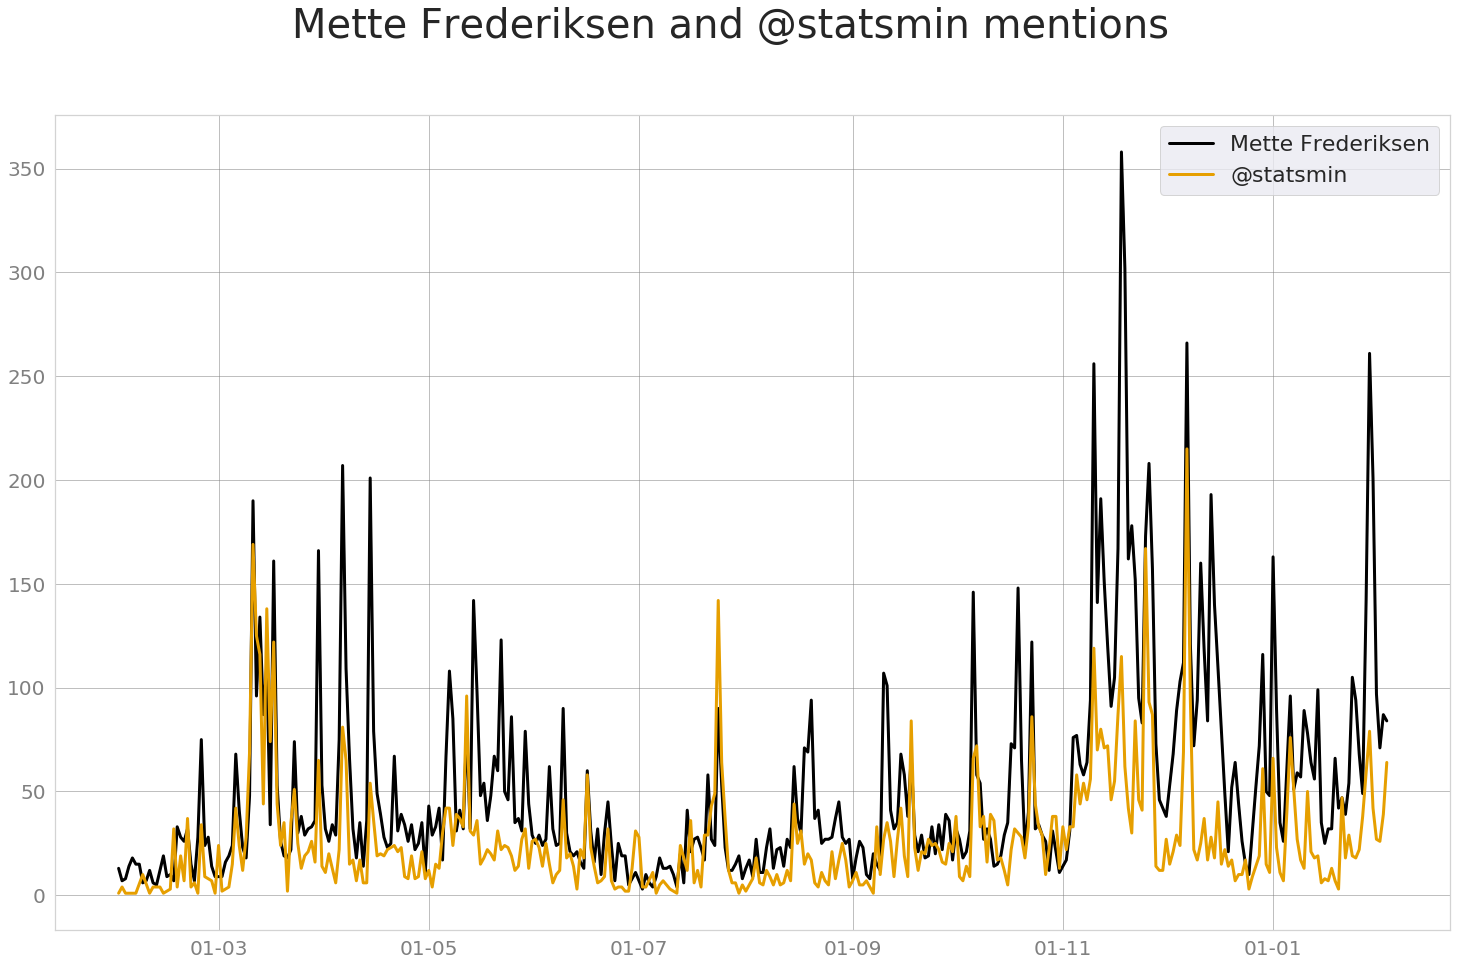

In [16]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

#nr_colors = len(freq_df["date"].unique())

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

#palette = sns.color_palette("inferno", nr_colors)

fig, ax1 = plt.subplots(figsize=a4_dims)
sns.set(font_scale = 2)
ax2 = sns.lineplot(x="date", y="nr_of_tweets", 
                 # palette = palette, 
                   label = "Mette Frederiksen",
                     linewidth = 3, data = MF_freq_df)
ax2 = sns.lineplot(x="date", y="nr_of_tweets", 
                 # palette = palette, 
                   label = "@statsmin",
                     linewidth = 3, data = s_freq_df)
ax2.set(xlabel="", ylabel = "")
ax2.xaxis.get_label().set_fontsize(40)
ax2.yaxis.get_label().set_fontsize(40)

ax2.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax2.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax2.xaxis.set_major_formatter(date_form)


    
fig.suptitle("Mette Frederiksen and @statsmin mentions", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()

plot_name = "fig/tweet_frequency.png"
fig.savefig(plot_name)

fig.show()

# Bin #mettef based on month

In [17]:
df["month"] = pd.to_datetime(df["created_at"], utc=True).dt.strftime('%Y-%m')

In [18]:
def get_tweet_frequencies(df):
    # Add freq of hashtags by themselves in the dataset
    tweet_freq = pd.DataFrame({'nr_of_tweets' : df.groupby(['month']).size()}).reset_index()

    # Add the whole_frew to id_hashtag
    freq_hashtags = pd.merge(df, tweet_freq, how='left', on=['month'])#, 'id', 'created_at'])
    
    df0 = freq_hashtags
    return df0

In [19]:
month_df = get_tweet_frequencies(df)
month_df["month"] = pd.to_datetime(month_df["month"])

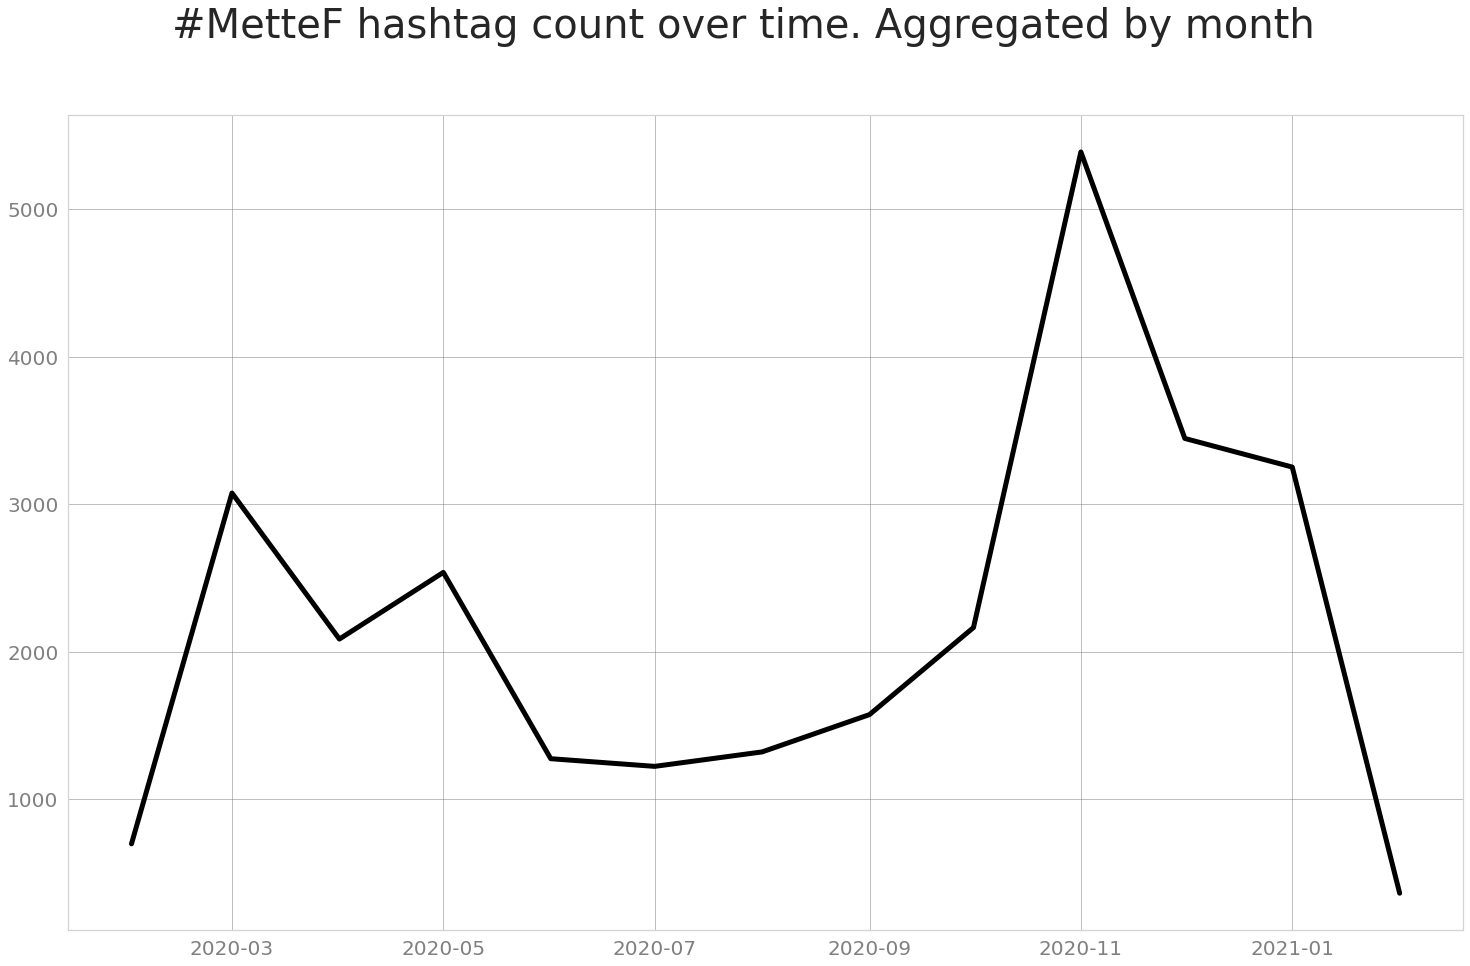

In [20]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

#nr_colors = len(freq_df["date"].unique())

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

#palette = sns.color_palette("inferno", nr_colors)

fig, ax1 = plt.subplots(figsize=a4_dims)
sns.set(font_scale = 2)
ax2 = sns.lineplot(x="month", y="nr_of_tweets", 
                 # palette = palette, 
                     linewidth = 5, data = month_df)
ax2.set(xlabel="", ylabel = "")
ax2.xaxis.get_label().set_fontsize(40)
ax2.yaxis.get_label().set_fontsize(40)

ax2.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax2.xaxis_date()
#date_form = mdates.DateFormatter("%d-%m")
#ax2.xaxis.set_major_formatter(date_form)


    
fig.suptitle("#MetteF hashtag count over time. Aggregated by month", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()

#plot_name = "fig/survey_anxiety_visuals/" + "mean_anxiety_per_question" + ".png"
#fig.savefig(plot_name)

fig.show()

## Hashtags

In [21]:
import re

def extract_hashtags(row):
    unique_hashtag_list = list(re.findall(r'#\S*\w', row["text"]))
    return unique_hashtag_list

def hashtag_per_row(data):
    # Create hashtags column with the actual unique hashtags
    data["hashtags"] = data.apply(lambda row: extract_hashtags(row), axis = 1)

    # Let's take a subset of necessary columns, add id
    df = data[["date", "hashtags"]].reset_index().rename(columns={"index": "id"})

    # Select only the ones where we have more than 1 hashtag per tweet
    df = df[df["hashtags"].map(len) > 1].reset_index(drop=True)

    # Hashtag per row
    # convert list of pd.Series then stack it
    df = (df
     .set_index(['date','id'])['hashtags']
     .apply(pd.Series)
     .stack()
     .reset_index()
     .drop('level_2', axis=1)
     .rename(columns={0:'hashtag'}))
    #lowercase!
    df["hashtag"] = df["hashtag"].str.lower()
    df["hashtag"] = df["hashtag"].str.replace("'.", "")
    df["hashtag"] = df["hashtag"].str.replace("’.", "")

    return df

hashtags = hashtag_per_row(freq_df)

In [22]:
# Aggregate a frequency DF
def get_hashtag_frequencies(df):
    # Add freq of hashtags by themselves in the dataset
    tweet_freq = pd.DataFrame({'nr_of_hashtags' : df.groupby(['hashtag']).size()}).reset_index()
    return tweet_freq

In [23]:
freq_hashtags = get_hashtag_frequencies(hashtags)
dff = freq_hashtags.sort_values(by=['nr_of_hashtags'], ascending=False)

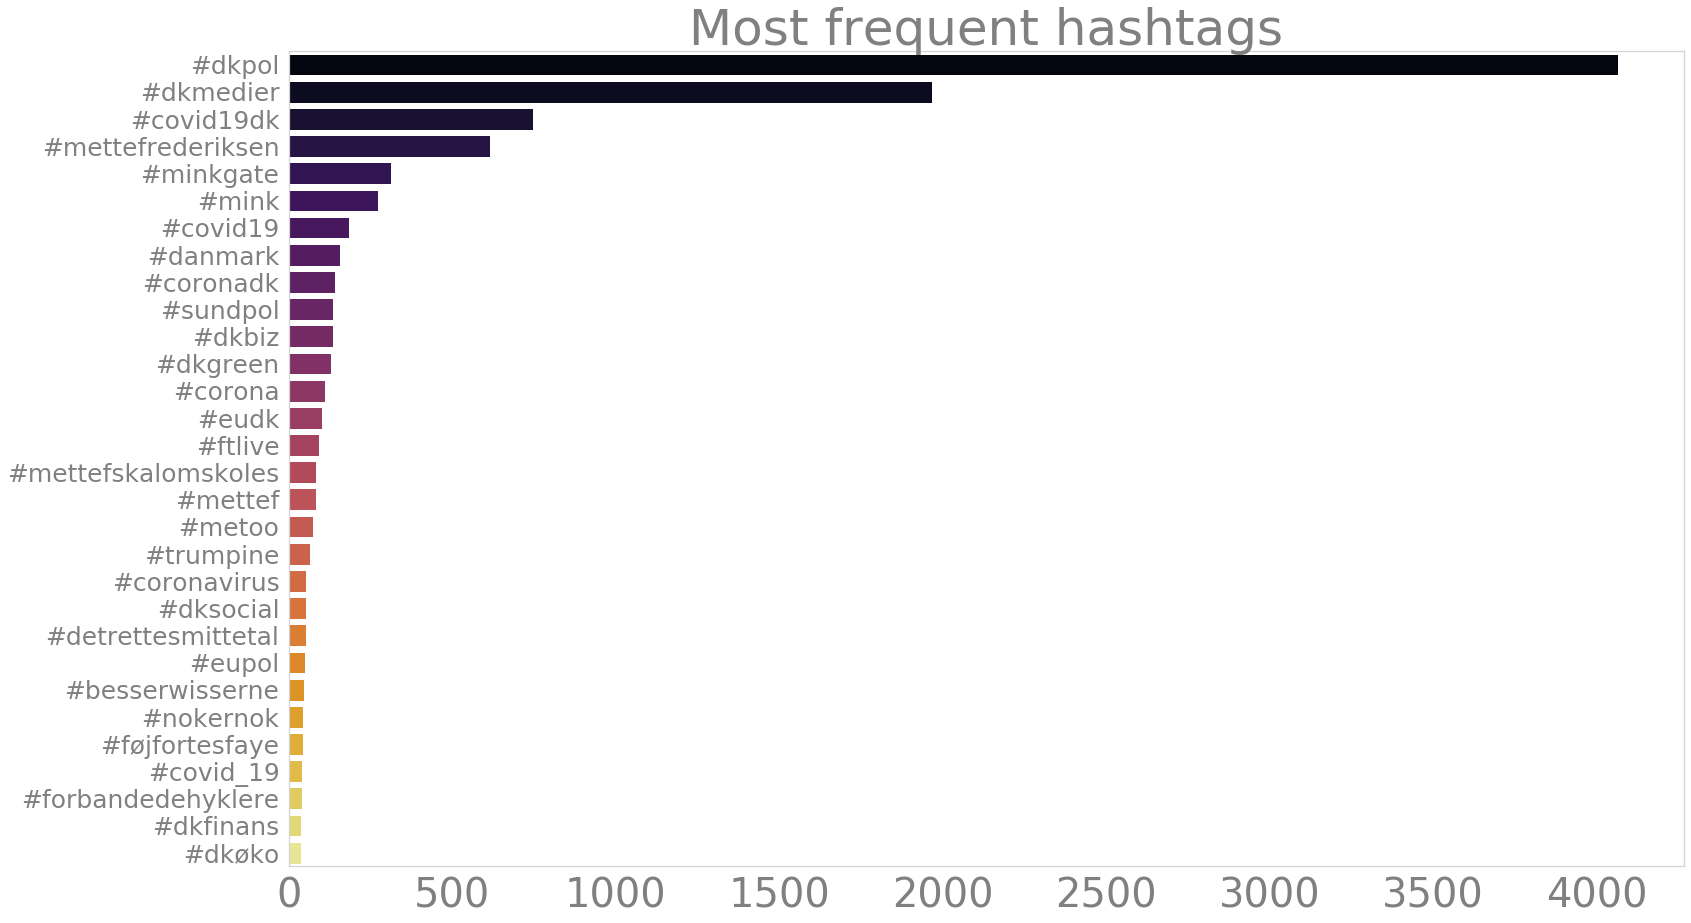

In [24]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pyplot_themes as themes

matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

df0 = dff.nlargest(30, columns=['nr_of_hashtags'])
nr_hash = len(df0["hashtag"].unique())
themes.theme_minimal(grid=False, ticks=False, fontsize=40)

a4_dims = (25,15) #(11.7, 8.27)
fig, (ax) = plt.subplots(1,1, figsize=a4_dims)

palette = sns.color_palette("inferno", nr_hash)

ax = sns.barplot(y="hashtag", x="nr_of_hashtags", palette = palette, data = df0)

ax.set(xlabel="Count", ylabel = "Hashtag")
ax.xaxis.get_label().set_fontsize(25)
ax.yaxis.get_label().set_fontsize(25)
ax.axes.set_title("Most frequent hashtags",fontsize=50)

plt.xticks(fontsize=40)
plt.yticks(fontsize=25)

ax.set(xlabel="", ylabel = "")
ax.xaxis.get_label().set_fontsize(100)
ax.yaxis.get_label().set_fontsize(40)

ax.grid(color='white', linestyle='-', linewidth=0.5, which= "both")

plot_name = "fig/frequent_hashtags.png"
fig.savefig(plot_name)

In [76]:
per_date = hashtags[['date', 'id', 'hashtag']].groupby(['date', 'hashtag']).agg(['count']).reset_index()
per_date["hashtag_per_date"] = per_date["id"]["count"]
per_date = per_date[["date", "hashtag", "hashtag_per_date"]]
per_date_hash = per_date.rename(columns={"hashtag": "Hashtag"})

## Sentiment analysis

In [25]:
df["date"] = pd.to_datetime(df["date"])

# Rolling average
df['compound_7day_ave'] = df.compound.rolling(7).mean().shift(-3)

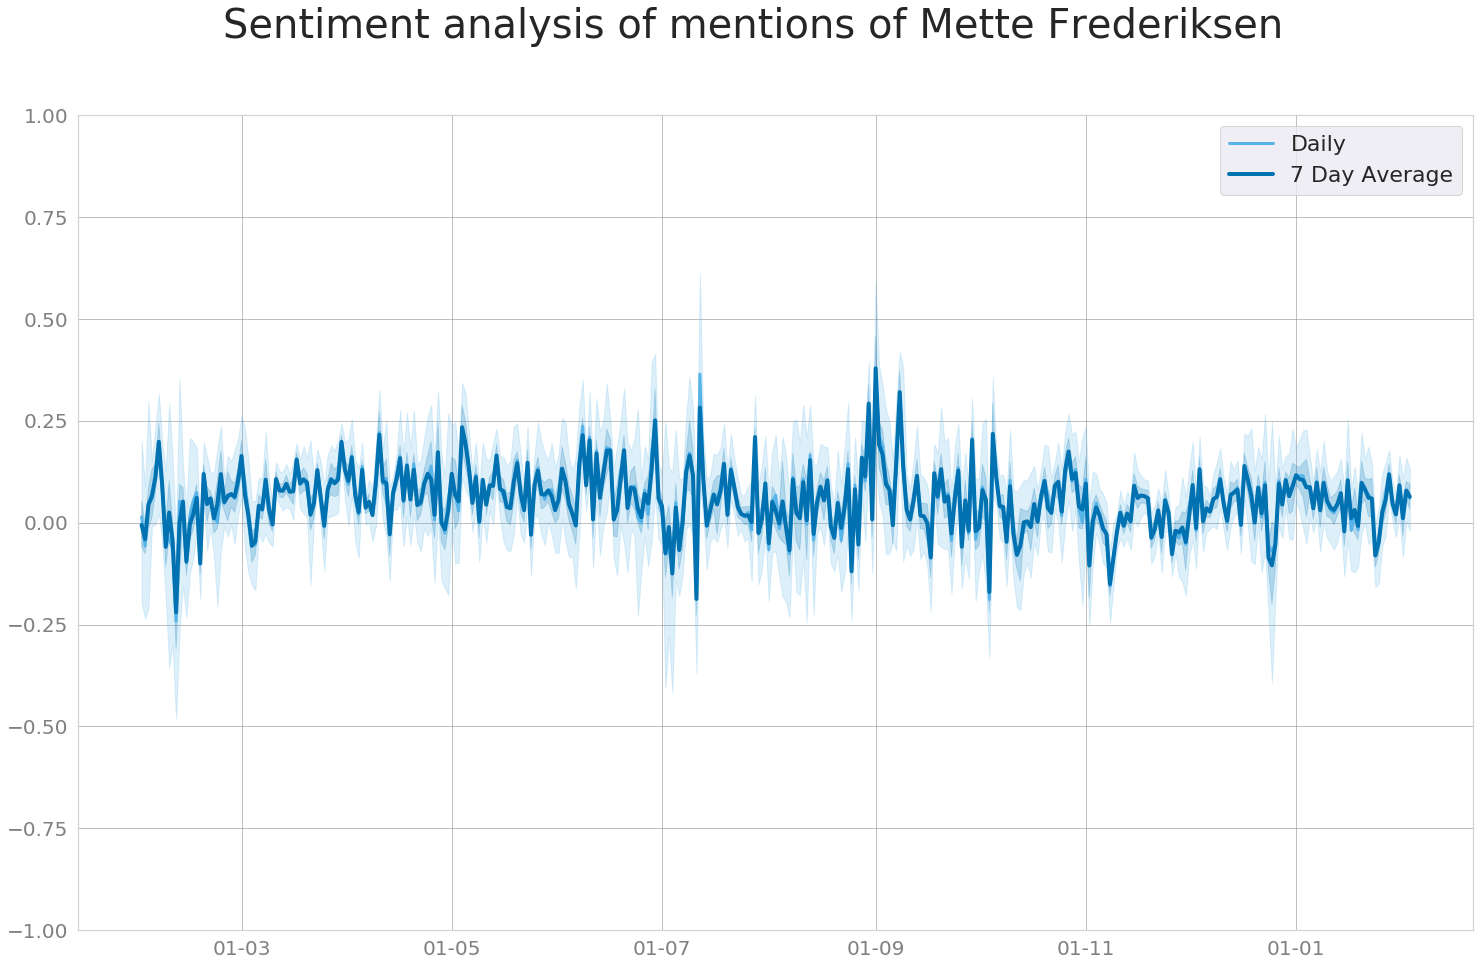

In [26]:
import datetime

matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)


themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)
ax1 = sns.lineplot(x="date", y="compound", 
                   label="Daily", color = palette[2],
                     linewidth = 3, data = df)

ax1 = sns.lineplot(x="date", y="compound_7day_ave", 
                   label="7 Day Average", color = palette[5],
                     linewidth = 4, data = df)


ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

    
fig.suptitle("Sentiment analysis of mentions of Mette Frederiksen", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()
ax1.set(ylim=(-1, 1))

plot_name = "fig/sentiment_compound.png"
fig.savefig(plot_name)

fig.show()

In [27]:
def get_monthly_compound(df):
    # Add freq of hashtags by themselves in the dataset
    tweet_freq = pd.DataFrame({'mean_compound' : df.groupby(['month']).mean('compound')}).reset_index()

    # Add the whole_frew to id_hashtag
    freq_hashtags = pd.merge(df, tweet_freq, how='left', on=['month'])#, 'id', 'created_at'])
    
    df0 = freq_hashtags
    return df0

month_df = get_tweet_frequencies(df)
month_df["month"] = pd.to_datetime(month_df["month"])

# Rolling average
month_df['compound_7day_ave'] = month_df.compound.rolling(7).mean().shift(-3)

In [28]:
month_df = month_df[["compound", "month"]]

In [29]:
monthly= month_df.resample("M", on = "month").mean().reset_index()
monthly["month"] = pd.to_datetime(monthly["month"])

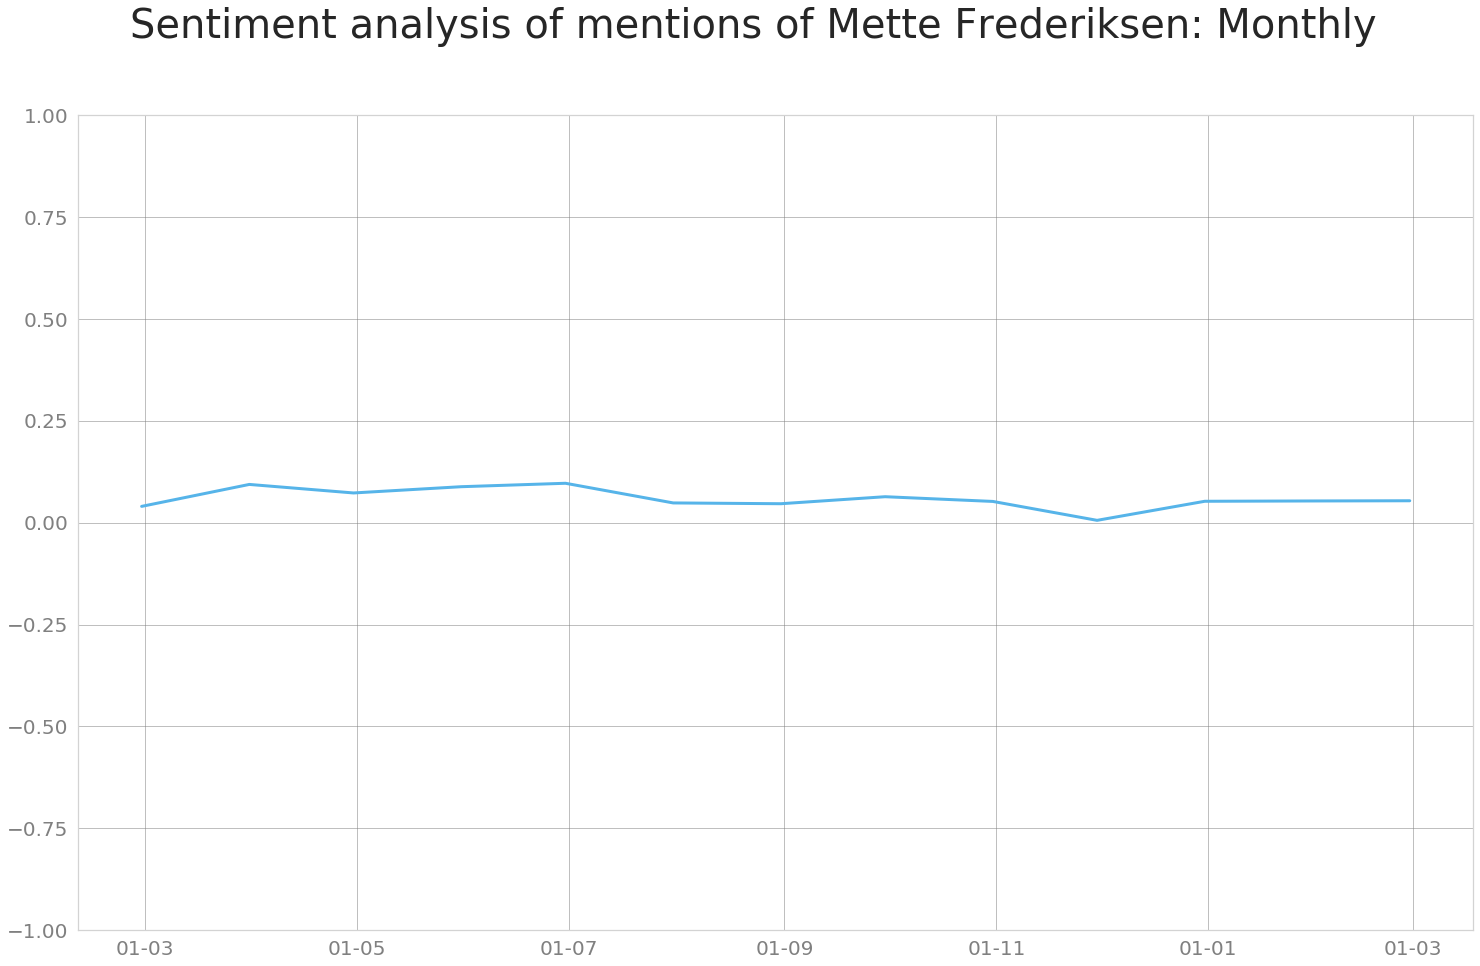

In [30]:
import datetime

matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)


themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)
ax1 = sns.lineplot(x="month", y="compound", 
                   color = palette[2],
                     linewidth = 3, data = monthly)

#ax1 = sns.lineplot(x="date", y="compound_7day_ave", 
#                   label="7 Day Average", color = palette[5],
#                     linewidth = 4, data = month_df)


ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

    
fig.suptitle("Sentiment analysis of mentions of Mette Frederiksen: Monthly", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()
ax1.set(ylim=(-1, 1))

plot_name = "fig/sentiment_compound_monthly.png"
fig.savefig(plot_name)

fig.show()

## Word frequency

In [31]:
import spacy
import string
from string import digits
import nltk

sp = spacy.load('da_core_news_lg')

file = open("../hope-b117/stop_words.txt","r+")
stop_words = file.read().split()

# Lemmatize stop words
stops = " ".join(stop_words)
stops = sp(stops)
my_stop_words = [t.lemma_ for t in stops]

In [37]:
def lemmas(row):
    tweet = row["mentioneless_text"].lower()
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    #tweet = tweet.translate(str.maketrans('', '', digits))
    tweet = tweet.replace('”', '')
    tweet = tweet.replace('“', '')
    tweet = tweet.replace('»', '')
    tweet = tweet.replace('…','')
    
    sentence = sp(tweet)
    
    lemmas = []
    for word in sentence:
        lemmas.append(word.lemma_)
    
    res = [x for x in lemmas if x not in my_stop_words]
    hmm = ['    ','   ','  ',' ','', '🇩','🇰', '♂', '🤷']
    res = [x for x in res if x not in hmm]
    return res

freq_df["tokens_list"] = freq_df.apply(lambda row: lemmas(row), axis = 1)

In [81]:
def join_tokens(row):
    res = " ".join(row["tokens_list"])
    return res

freq_df["tokens_string"] = freq_df.apply(lambda row: join_tokens(row), axis = 1)
texts = freq_df["tokens_string"]

In [82]:
import string

texts = ", ".join(texts)
texts = texts.translate(str.maketrans('', '', string.punctuation))
texts = texts.lower()

In [83]:
word_freq = freq_df.tokens_string.str.split(expand=True).stack().value_counts()

In [84]:
word_freq = word_freq.to_frame().reset_index().rename(columns={"index": "word", 0: "Frequency"})

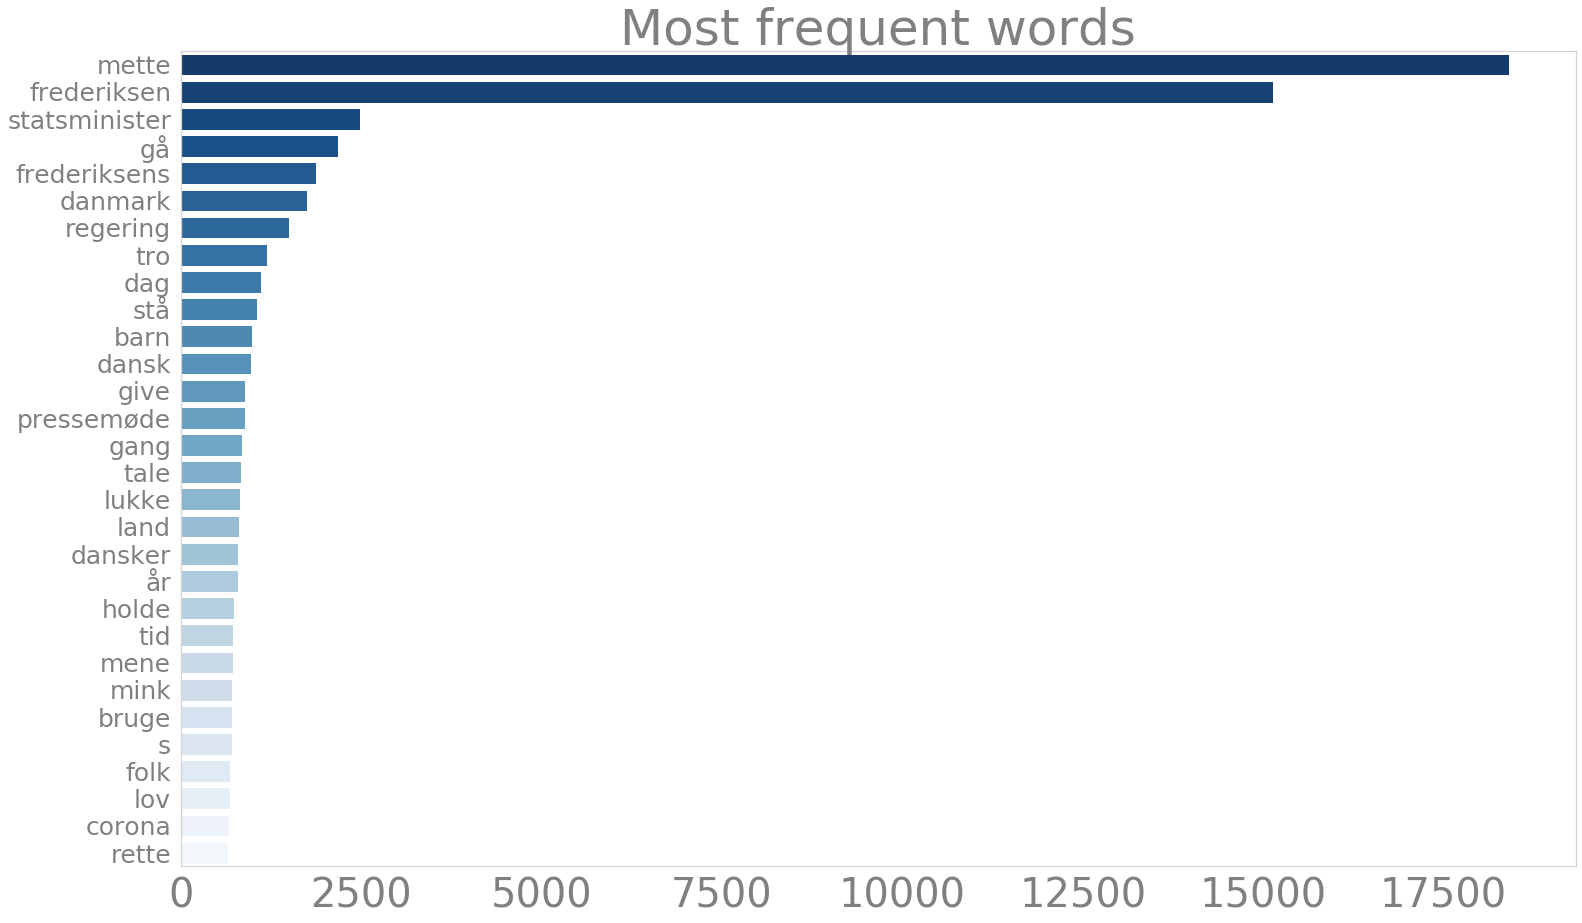

In [85]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pyplot_themes as themes

file = open("../hope-b117/stop_words.txt","r+")
stop_words = file.read().split()

word_freq = word_freq[~word_freq["word"].isin(stop_words)]
df0 = word_freq.nlargest(30, columns=['Frequency'])
nr_hash = len(df0["word"].unique())

matplotlib.rc('ytick', labelsize=30)
matplotlib.rc('xtick', labelsize=30)

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

fig, (ax) = plt.subplots(1,1, figsize=a4_dims)

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
palette = sns.color_palette("Blues_r", nr_hash)

ax = sns.barplot(y="word", x="Frequency", palette = palette, data = df0)

ax.set(xlabel="Count", ylabel = "Hashtag")
ax.xaxis.get_label().set_fontsize(25)
ax.yaxis.get_label().set_fontsize(25)
ax.axes.set_title("Most frequent words",fontsize=50)

plt.xticks(fontsize=40)
plt.yticks(fontsize=25)

ax.set(xlabel="", ylabel = "")
ax.xaxis.get_label().set_fontsize(100)
ax.yaxis.get_label().set_fontsize(40)

plot_name = "fig/word_frequency.png"
fig.savefig(plot_name)

In [86]:
df0["word"]

0             mette
1       frederiksen
2     statsminister
3                gå
4      frederiksens
5           danmark
6          regering
7               tro
8               dag
9               stå
10             barn
11            dansk
12             give
13       pressemøde
14             gang
15             tale
16            lukke
17             land
18          dansker
19               år
20            holde
21              tid
22             mene
23             mink
24            bruge
25                s
26             folk
27              lov
28           corona
29            rette
Name: word, dtype: object

In [87]:
def tokens_per_row(data):
    # Let's take a subset of necessary columns, add id
    df = data[["date", "tokens_list"]].reset_index().rename(columns={"index": "id"})

    # Select only the ones where we have more than 1 hashtag per tweet
    #df = df[df["hashtags"].map(len) > 1].reset_index(drop=True)

    # Token per row
    # convert list of pd.Series then stack it
    df = (df
     .set_index(['date','id'])['tokens_list']
     .apply(pd.Series)
     .stack()
     .reset_index()
     .drop('level_2', axis=1)
     .rename(columns={0:'token'}))
    #lowercase!
    #df["token"] = df["token"].str.lower()
    #df["token"] = df["token"].str.replace("'.", "")
    #df["token"] = df["token"].str.replace("’.", "")

    return df

token_df = tokens_per_row(freq_df)
token_df.head()

,date,id,token
0,2020-04-08,0,mette
1,2020-04-08,0,frederiksen
2,2020-04-08,0,forsikre
3,2020-04-08,0,varsle
4,2020-04-08,0,genåbning


In [88]:
per_date = token_df[['date', 'id', 'token']].groupby(['date', 'token']).agg(['count']).reset_index()
per_date["token_per_date"] = per_date["id"]["count"]
per_date = per_date[["date", "token", "token_per_date"]]
per_date_token = per_date.rename(columns={"token": "Token"})

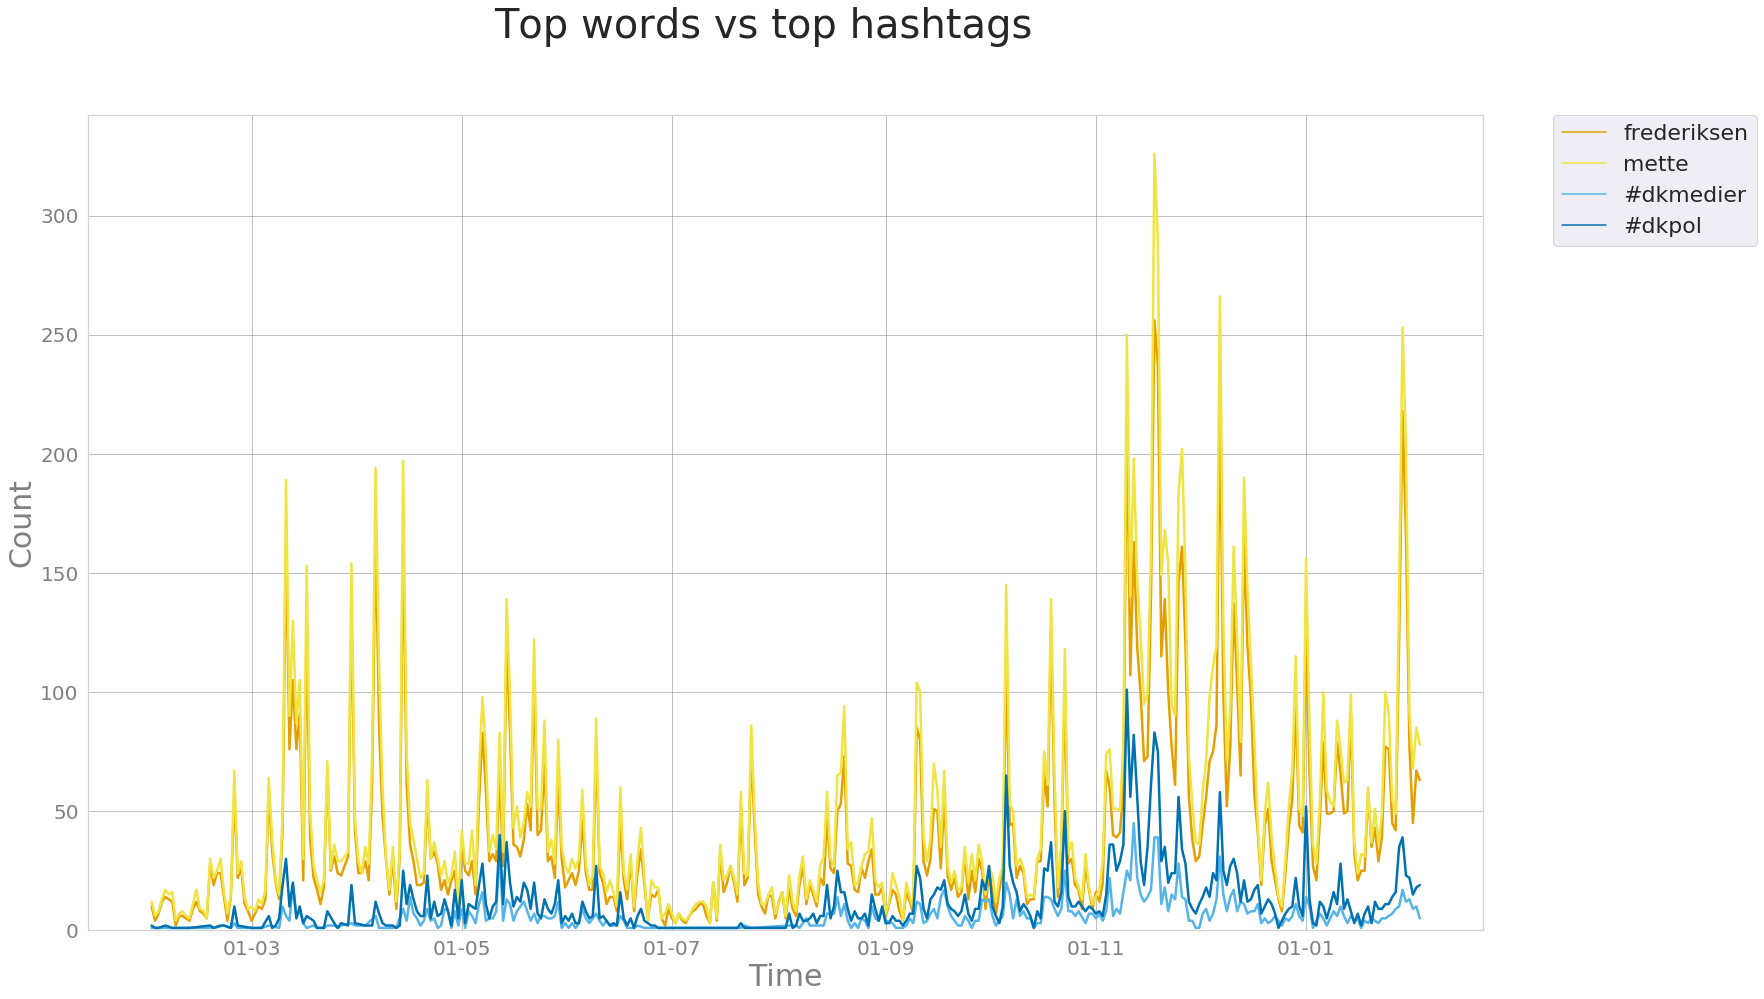

In [96]:
df_token = per_date_token.loc[per_date_token['Token'].isin(df0["word"][0:2])]
df_hash = per_date_hash.loc[per_date_hash['Hashtag'].isin(dff["hashtag"][0:2])]

nr_hash = len(df1["Token"].unique())

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

#palette = sns.color_palette("inferno", nr_hash)
palette = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, ax = plt.subplots(figsize=a4_dims)
sns.set(font_scale = 2)

ax = sns.lineplot(x="date", y="token_per_date", 
                  hue="Token", style="Token", 
                  markers = False, markersize = 10, 
                  dashes = False, 
                  palette = [palette[0], palette[3]], 
                  linewidth = 2.5, data = df_token)

ax = sns.lineplot(x="date", y="hashtag_per_date", 
                  hue="Hashtag", style="Hashtag", 
                  markers = False, markersize = 10, 
                  dashes = False, 
                  palette = [palette[1], palette[4]], 
                  linewidth = 2.5, data = df_hash)

ax.set(xlabel="Time", ylabel = "Count")
ax.xaxis.get_label().set_fontsize(30)
ax.yaxis.get_label().set_fontsize(30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

#plt.ylim(0, 80)

# Define the date format
ax.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)

ax.set(ylim=(0, None))
fig.suptitle('Top words vs top hashtags', fontsize=40)
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()

plot_name = "fig/words_vs_hashtags_over_time.png"
fig.savefig(plot_name)

fig.show()

## Word cloud

In [97]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    plot_name = "fig/word_cloud.png"
    plt.savefig(plot_name)

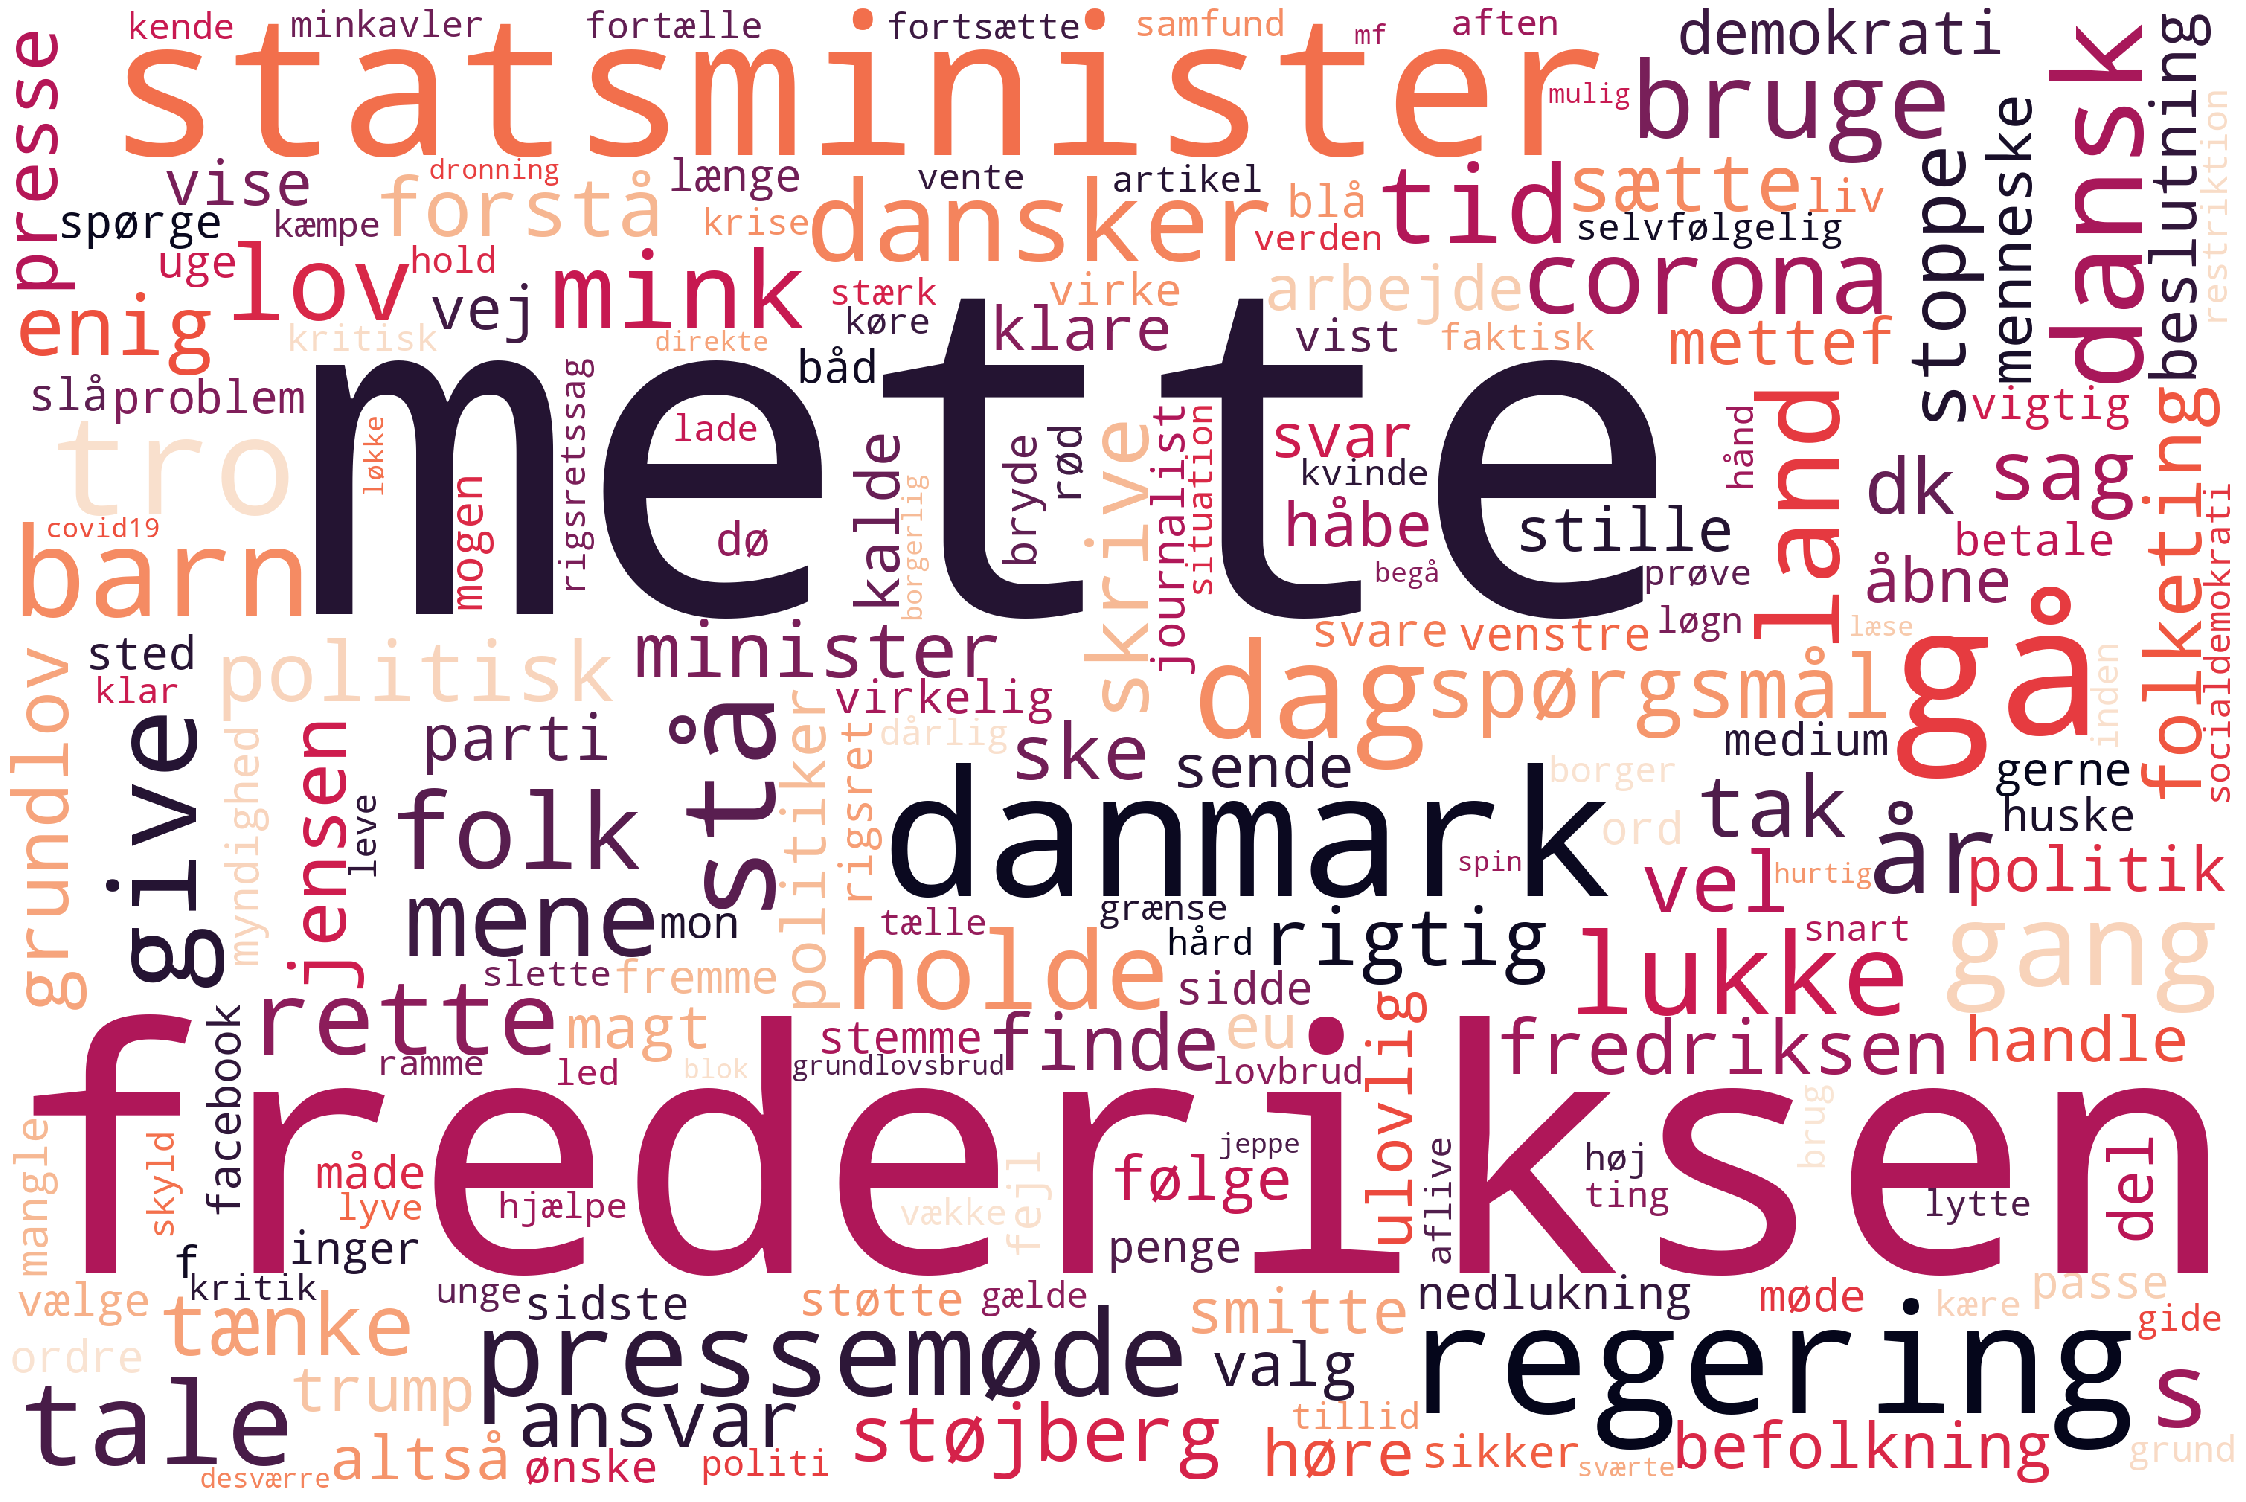

In [98]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='white', colormap="rocket", 
                      collocations=False, stopwords = stop_words).generate(texts)
# Plot
plot_cloud(wordcloud)

## Co-occurrence

In [99]:
from nltk import bigrams
import itertools
import collections
import networkx as nx
import spacy
import nltk

In [100]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

#nlp = spacy.load("da_core_news_sm")

%matplotlib inline

In [101]:
# Create list of lists containing bigrams in tweets
#terms_bigram = list(bigrams(wordlist))
terms_bigram = [list(bigrams(tweet)) for tweet in freq_df['tokens_list']]
#terms_bigram = [list(bigrams(tweet)) for tweet in df['tokens_no_stop']]

# View bigrams for the first tweet
terms_bigram[0]

[('mette', 'frederiksen'),
 ('frederiksen', 'forsikre'),
 ('forsikre', 'varsle'),
 ('varsle', 'genåbning'),
 ('genåbning', 'upolitisk'),
 ('upolitisk', 'undre'),
 ('undre', 'ekspert')]

In [47]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

In [48]:
bigram_df = pd.DataFrame(bigram_counts.most_common(30), columns=["bigram", "count"])

In [49]:
len(bigram_counts)

189782

In [50]:
bigram_df.head(30)

,bigram,count
0,"(mette, frederiksen)",15041
1,"(mette, frederiksens)",1862
2,"(statsminister, mette)",1057
3,"(mette, fredriksen)",466
4,"(mogens, jensen)",274
5,"(frederiksen, gå)",238
6,"(inger, støjberg)",236
7,"(mette, f)",224
8,"(frederiksen, s)",173
9,"(tro, mette)",162


In [51]:
bigram_df = bigram_df.drop([7, 8, 13, 29]).reset_index(drop=True)

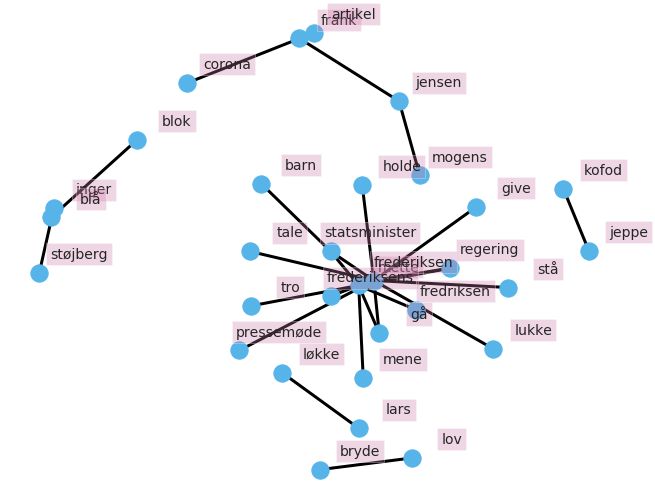

In [53]:
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

# Create dictionary of bigrams and their counts
d = bigram_df.set_index("bigram").T.to_dict("records")
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 5))

fig, ax = plt.subplots(figsize=(11, 9))

pos = nx.spring_layout(G, k=5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=3,
                 edge_color= palette[0], #'red',
                 node_color= palette[2], #'green',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.065
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor= palette[7], #'red', 
                      alpha=0.3), ## 0.5),
            horizontalalignment='center', fontsize=14)
    

fig.patch.set_visible(False)
ax.axis('off')

plt.savefig("fig/bigram_graph.png", dpi=150)

plt.show()

## Try more methods